### 1. Load package

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb


In [56]:
df = pd.read_csv("./data/train.csv").drop(columns="UID")
df

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
9996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
9997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
9998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  object 
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  object 
 11  대출 상환 기간           10000 non-null  object 
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
 16  채무 불이행 여부          1000

In [58]:
df.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


### 2. EDA

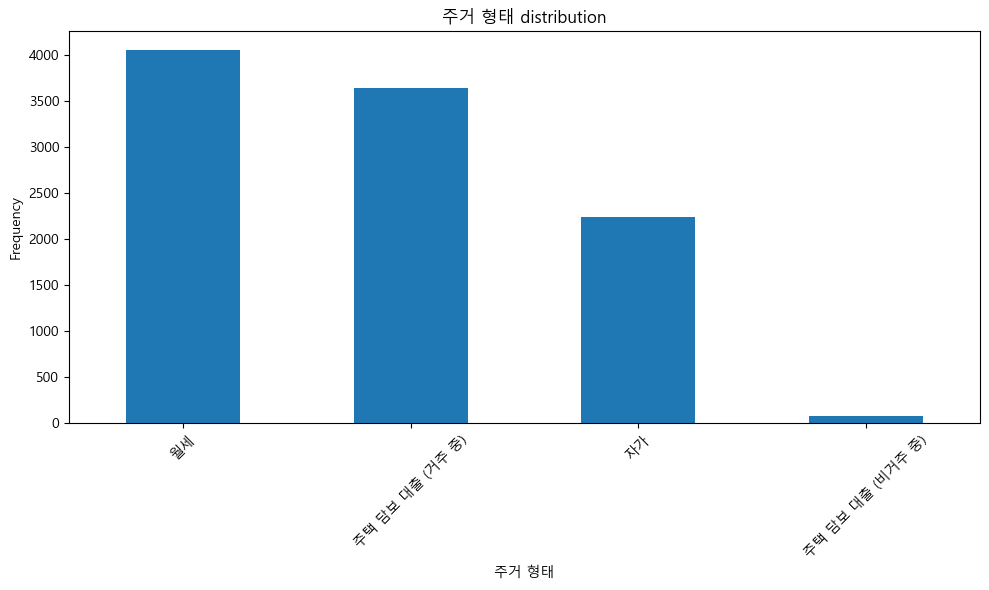

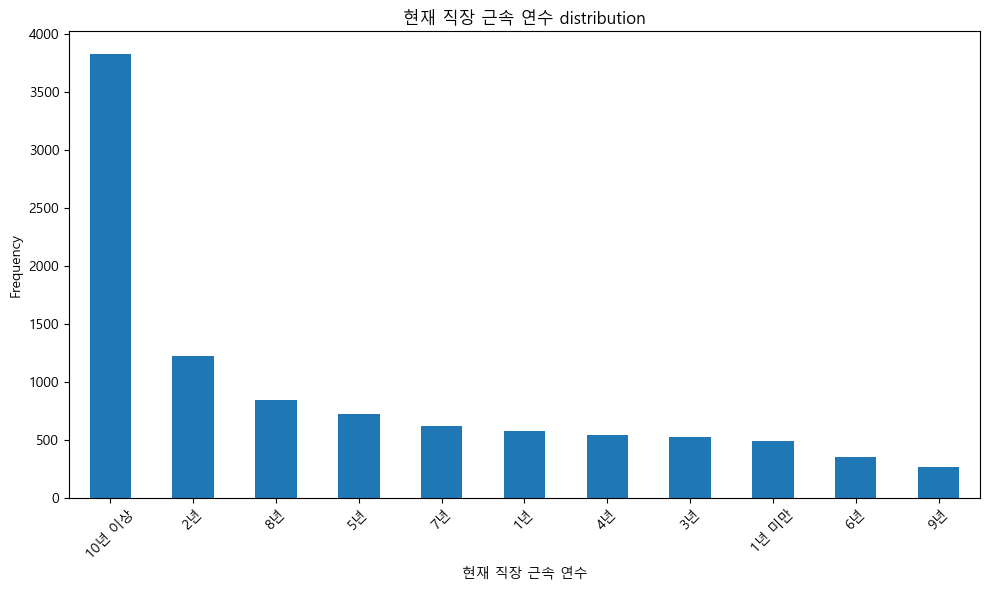

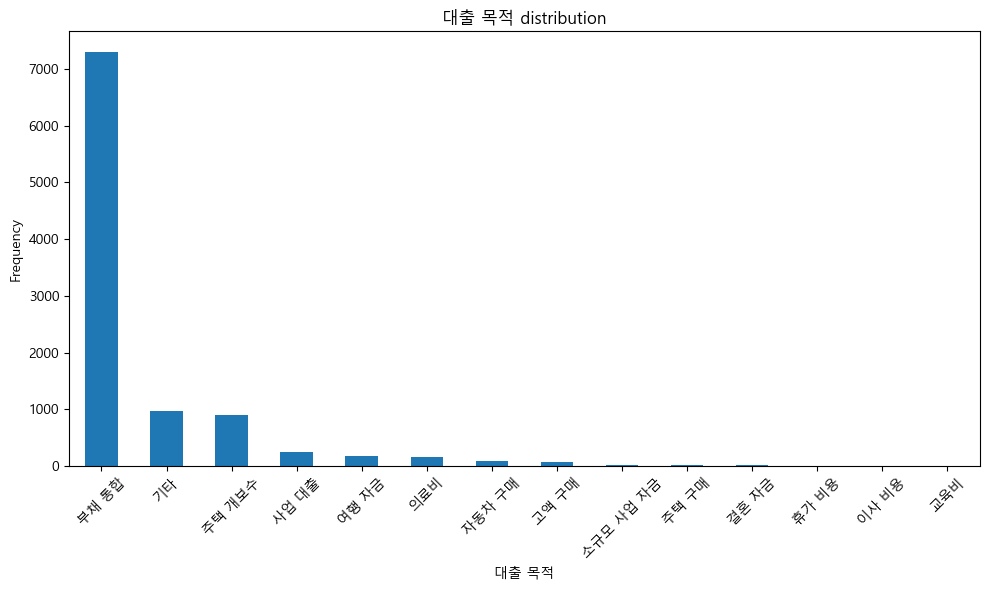

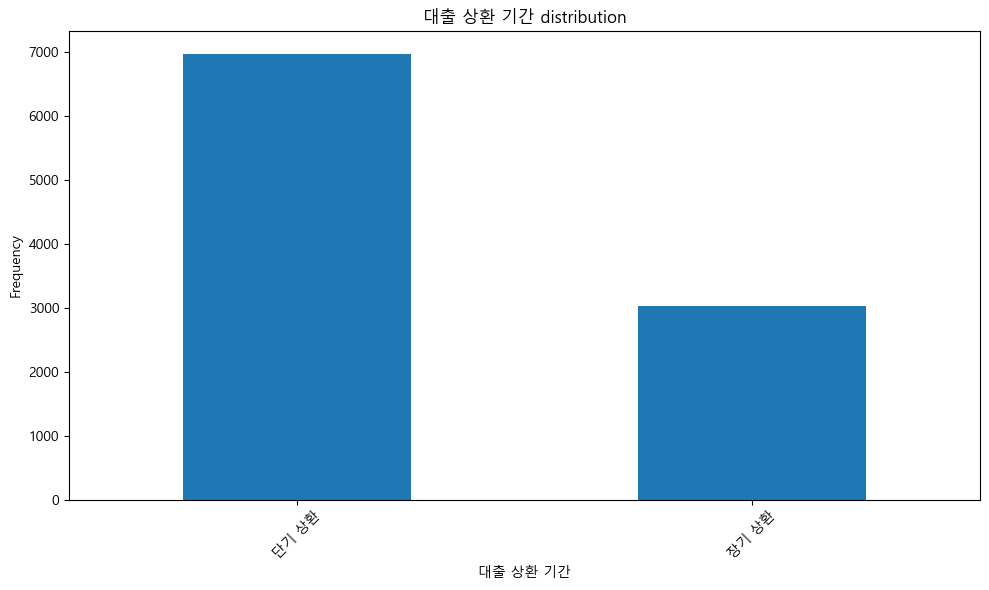

In [59]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False  # 음수 부호가 깨지지 않도록 설정
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Object type인 4개의 칼럼의 distribution 관찰 결과
+ 주거 형태
    + 칼럼값 중, 주담대 관련 칼럼이 거주중, 비거주중 2개의 클래스로 나눠져있음.
    + 전체 클래스 비율로 보나, 두 클래스만의 비율로 보나 클래스 불균형이 심함
    + 두 클래스를 한 클래스로 합쳐 사용하는 방안을 고려할 수 있음
    + Non-ordinal categorical data
+ 현재 직장 근속 연수
    + 상식적으로 근속연수가 길면 직업안정성이 높고, 대출을 정상 상환할 가능성이 높다고 볼 수 있음
    + Ordinal categorical data로 Data processing과정에서 순서를 살리는게 중요한 포인트
+ 대출 목적
    + 상위 3개의 클래스를 제외하면 모두 소수 클래스임
    + "부채 통합"의 의미를 잘 파악하는 과정이 필요하고, binary class로 Dummy variable로 변환하는 방법을 고려해볼 수 있음
    + Non-rodinal categorical data


In [60]:
# 현재 직장 근속 연수 Label Encoding
ordered_categories = [['1년 미만', '1년', '2년', '3년', '4년', '5년', '6년', '7년', '8년', '9년', '10년 이상']]

# OrdinalEncoder 객체 생성 및 피팅
encoder = OrdinalEncoder(categories=ordered_categories)
df['현재 직장 근속 연수'] = encoder.fit_transform(df[['현재 직장 근속 연수']]).astype(int)


In [61]:
# 주거 형태 칼럼의 클래스 축소
df['주거 형태'] = df['주거 형태'].str.replace(r'^주택 담보 대출.*', '주택 담보 대출', regex=True)

# one-hot encoding을 적용할 칼럼 리스트 (예시로 '주거형태' 칼럼 사용)
columns_to_encode = ['주거 형태']

# pd.get_dummies를 사용하여 one-hot encoding 진행
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [ ]:
# 새로운 binary 칼럼 생성
most_freq = df['대출 목적'].value_counts().idxmax()
df['대출 목적_binary'] = df['대출 목적'].apply(lambda x: most_freq if x == most_freq else '나머지')

# 원본 '대출 목적' 칼럼 삭제
df.drop('대출 목적', axis=1, inplace=True)

# binary 칼럼에 대해 one-hot encoding 수행
df = pd.get_dummies(df, columns=['대출 목적_binary'], prefix='대출 목적_binary')


In [65]:
df

,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출,대출 목적_binary_나머지,대출 목적_binary_부채 통합
0,1941337.5,10,0.0,9,13.4,400597.5,0,24,1,단기 상환,390903.0,225457.5,8806.5,767,0,False,True,False,False,True
1,1979505.0,10,0.0,5,15.1,360679.5,0,11,0,단기 상환,1002184.5,64749.0,24961.5,767,0,True,False,False,False,True
2,1356381.0,4,0.0,12,18.8,491770.5,1,74,3,단기 상환,227775.0,487644.0,12069.0,800,1,True,False,False,False,True
3,1049017.5,6,0.0,15,14.8,411546.0,1,22,1,단기 상환,251383.5,413211.0,31749.0,796,1,True,False,False,False,True
4,4320217.5,2,0.0,11,26.1,895288.5,0,32,0,장기 상환,1163176.5,78991.5,5862.0,751,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,10,0.0,9,18.7,319027.5,0,68,0,단기 상환,126216.0,177028.5,6237.0,755,0,False,False,True,False,True
9996,2297230.5,2,0.0,11,28.3,399799.5,0,7,0,장기 상환,371907.0,347449.5,53301.0,707,0,False,False,True,True,False
9997,1221523.5,10,0.0,9,30.1,823305.0,0,14,0,장기 상환,869736.0,176905.5,11436.0,733,0,False,False,True,False,True
9998,3343584.0,10,0.0,10,20.3,724314.0,0,25,0,단기 상환,443008.5,139294.5,25567.5,696,0,False,True,False,False,True
